### Mutual Information and Correlation over Spatial Domain

In [13]:
from logger.logger import setup_logging
from utils.configs import BaseConf
from utils.utils import get_data_sub_paths
from utils.setup import setup
from utils.preprocessing import Shaper
from pprint import pprint
import numpy as np
from utils.utils import describe_array
from scipy.stats import pearsonr
import plotly.graph_objects as go
from sparse_discrete_table import new_discrete_table,quick_cond_mutual_info, quick_mutual_info, SparseDiscreteTable
from utils.plots import im
from utils.forecasting import vector_auto_corr
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd
import os
from matplotlib import rcParams
from utils.rolling import rolling_norm
from IPython.display import HTML
from utils.utils import topk
from utils.plots import plot_time_signals
from utils.plots import plot
from utils.mutual_information_plots import plot_mi_curves, subplot_mi_curves
import plotly.io as pio


# ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
pio.templates.default = "plotly_white" # "none"

os.environ['NUMEXPR_MAX_THREADS'] = str(os.cpu_count())
rcParams["font.family"] = "STIXGeneral"

In [14]:
import pingouin as pg
import scipy as sp

In [6]:
data_sub_paths = get_data_sub_paths()
pprint(np.sort(data_sub_paths))

data_sub_path = 'T24H-X1275M-Y1320M_2012-01-01_2019-01-01_#939'
# data_sub_path = 'T1H-X2550M-Y2640M_2014-01-01_2019-01-01_#7ce'

array(['T168H-X1275M-Y1320M_2001-01-04_2019-01-03_#1f1',
       'T1H-X2550M-Y2640M_2014-01-01_2019-01-01_#7ce',
       'T24H-X1275M-Y1320M_2012-01-01_2019-01-01_#939',
       'T24H-X1700M-Y1760M_2014-01-01_2019-01-01_#828',
       'T24H-X255M-Y220M_2012-01-01_2019-01-01_#c97',
       'T24H-X425M-Y440M_2012-01-01_2019-01-01_#827',
       'T24H-X850M-Y880M_2012-01-01_2019-01-01_#826',
       'Totals_T168H_2001-01-04_2019-01-10_LAT41.641_42.024_LON-87.821_-87.525',
       'Totals_T1H_2014-01-01_2019-01-01_LAT41.641_42.024_LON-87.821_-87.525',
       'Totals_T24H_2001-01-01_2019-01-02_LAT41.641_42.024_LON-87.821_-87.525'],
      dtype='<U70')


In [7]:
FREQ = data_sub_path.lstrip('T').split('-')[0]
conf, shaper, sparse_crimes, t_range, crime_feature_indices = setup(data_sub_path=data_sub_path)
dense_crimes = shaper.squeeze(sparse_crimes)

for i,k in enumerate(crime_feature_indices):
    print(f"'{k}':{i},")

'TOTAL':0,
'THEFT':1,
'BATTERY':2,
'CRIMINAL DAMAGE':3,
'NARCOTICS':4,
'ASSAULT':5,
'BURGLARY':6,
'MOTOR VEHICLE THEFT':7,
'ROBBERY':8,
'Arrest':9,


In [58]:
a = dense_crimes[:,0,40] # .mean(0)
m = np.mean(a)*np.ones(len(a))
plot(a=a,m=m)

In [59]:
pcorss = [] 
corrs = []
for lag in range(1,400):
    df = pd.DataFrame(index=t_range[lag:-1],data=dict(y=a[lag:],x=a[:-lag]))
    df['dow'] = df.index.dayofweek
    df['doy'] = df.index.month
    
    corrs.append(np.corrcoef(df.x,df.y)[0,1])
    pcorss.append(pg.correlation.partial_corr(df,x='x',y='y',x_covar=['doy','dow']).r[0])
    
    
plot(pcorss=pcorss,corrs=corrs)

In [60]:
totals = pd.DataFrame(index=t_range[:-1],data={"totals":dense_crimes[:,0].sum(-1)})
# plot_time_signals(t_range=totals.index,a=totals).show()

In [61]:
totals_normed = rolling_norm(totals, window=10, period=7).dropna()

# data = rolling_norm(data, window=10, period=7).dropna()
# data = rolling_norm(data, window=10, period=365).dropna()

In [62]:
from utils.data_processing import anscombe_transform

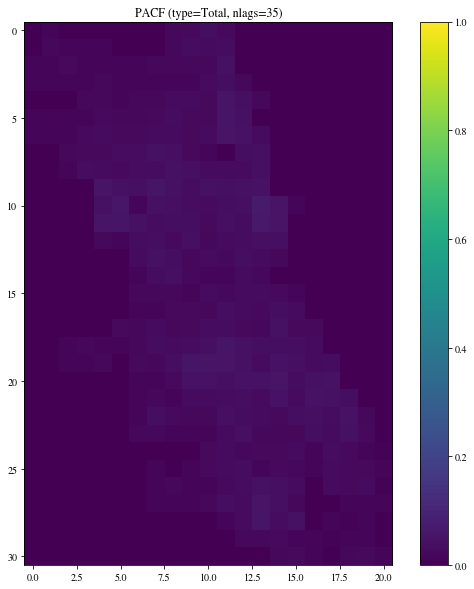

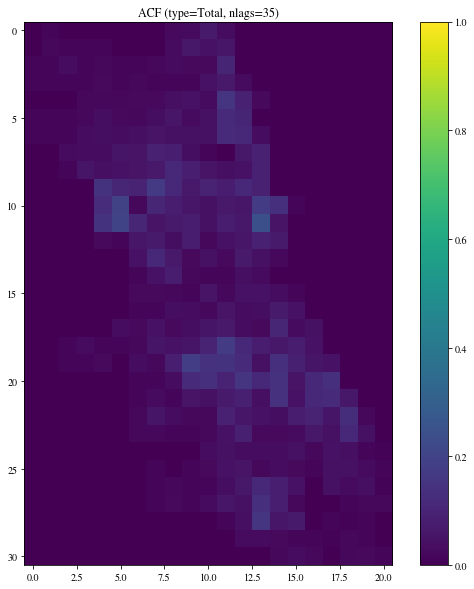

2021-01-23T10:09:48 | root | WARNING | binned 'a' into 35 bins => distribution: 
count    2557.000000
mean       10.564724
std         4.967285
min         0.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        34.000000
dtype: float64



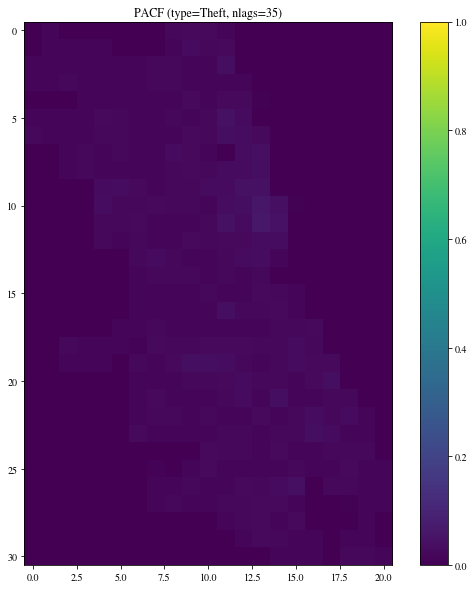

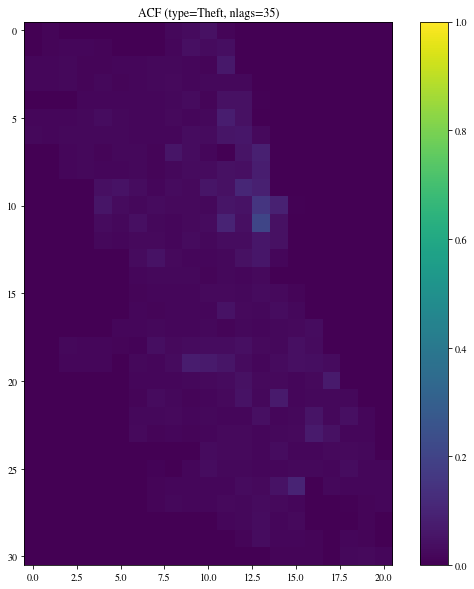

2021-01-23T10:09:51 | root | WARNING | binned 'a' into 34 bins => distribution: 
count    2557.000000
mean       12.332030
std         4.949317
min         0.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        33.000000
dtype: float64



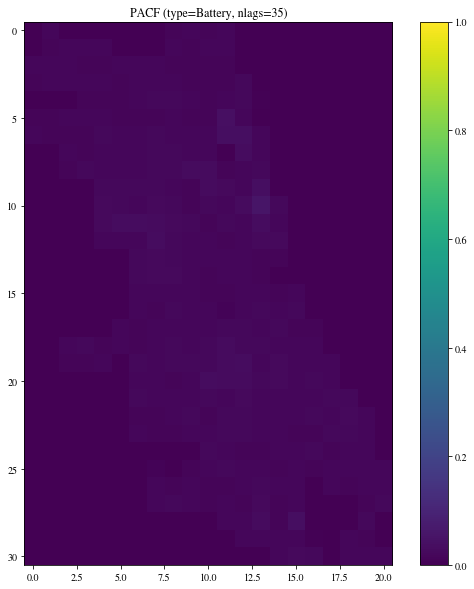

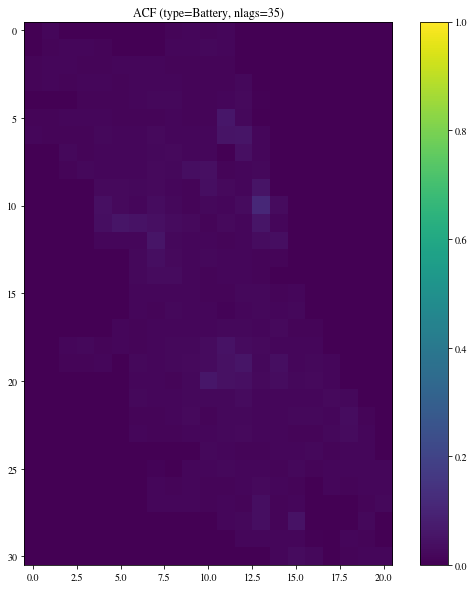

2021-01-23T10:09:55 | root | WARNING | binned 'a' into 35 bins => distribution: 
count    2557.000000
mean       10.564724
std         4.967285
min         0.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        34.000000
dtype: float64



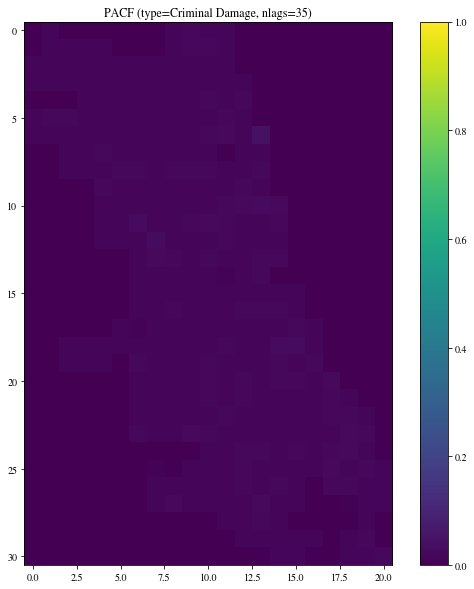

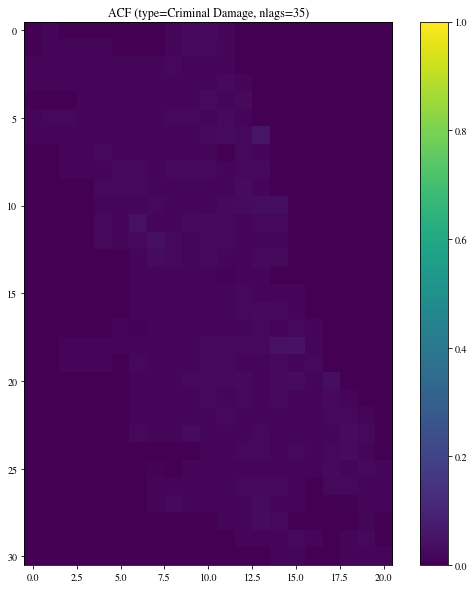

2021-01-23T10:09:58 | root | WARNING | binned 'a' into 6 bins => distribution: 
count    2557.000000
mean        0.003911
std         0.111822
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
dtype: float64



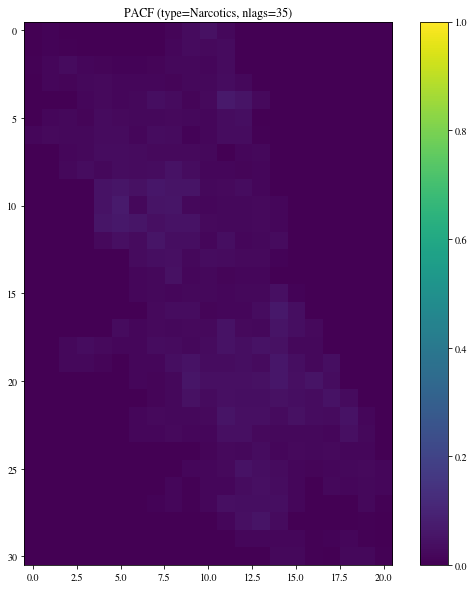

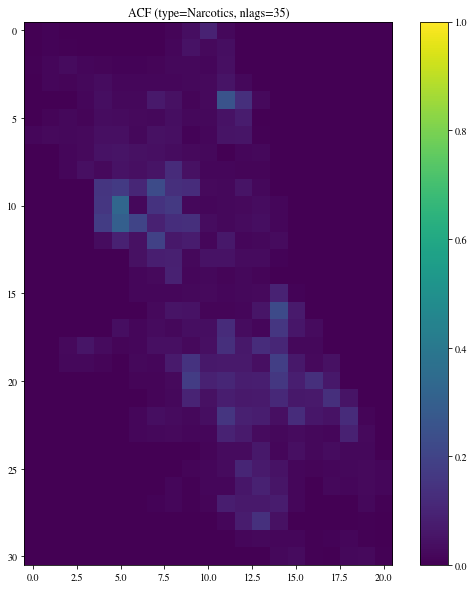

2021-01-23T10:10:01 | root | WARNING | binned 'a' into 18 bins => distribution: 
count    2557.000000
mean        5.336723
std         2.739690
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        17.000000
dtype: float64



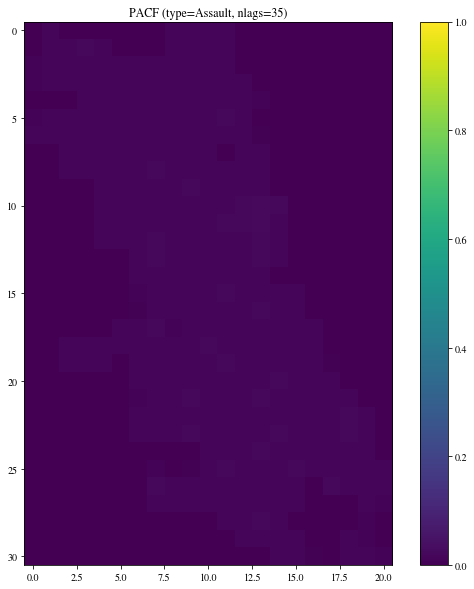

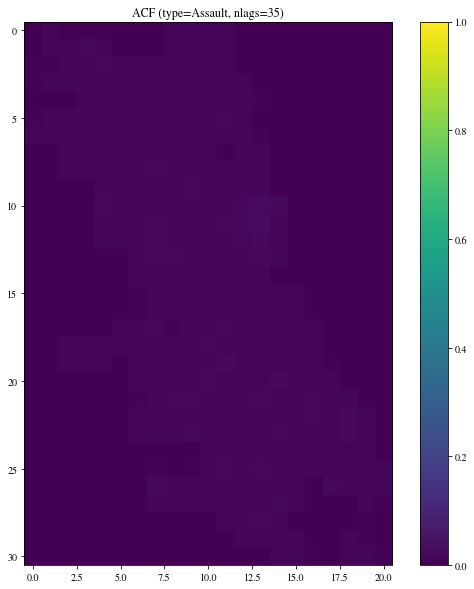

2021-01-23T10:10:04 | root | WARNING | binned 'a' into 35 bins => distribution: 
count    2557.000000
mean       10.564724
std         4.967285
min         0.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        34.000000
dtype: float64



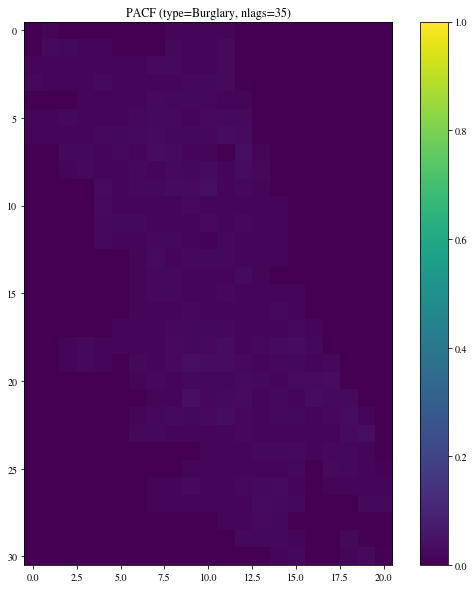

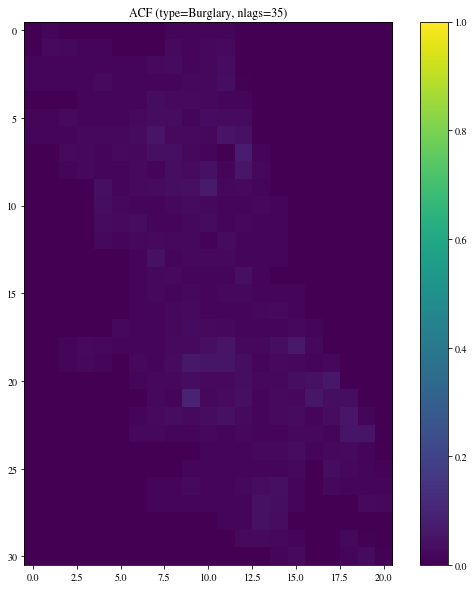

2021-01-23T10:10:08 | root | WARNING | binned 'a' into 10 bins => distribution: 
count    2557.000000
mean        1.909269
std         1.461685
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
dtype: float64



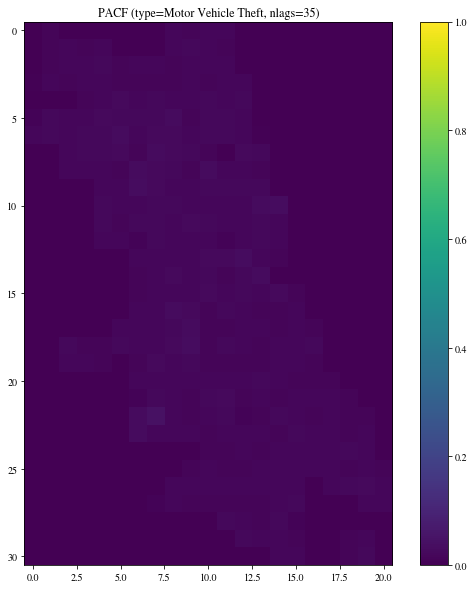

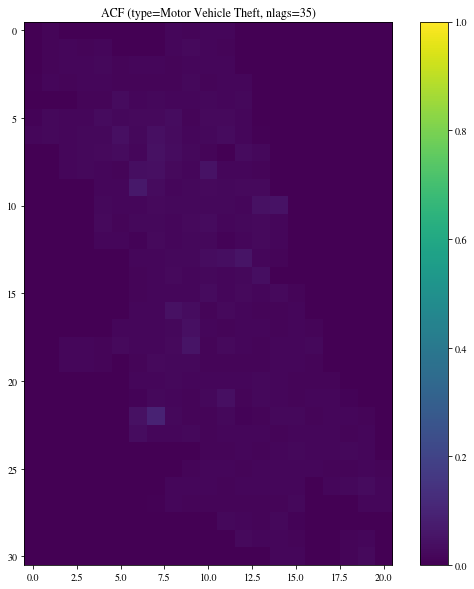

2021-01-23T10:10:11 | root | WARNING | binned 'a' into 9 bins => distribution: 
count    2557.000000
mean        0.353539
std         0.756919
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
dtype: float64



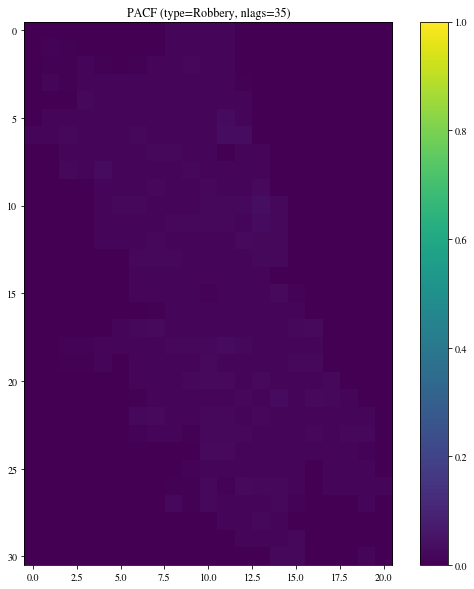

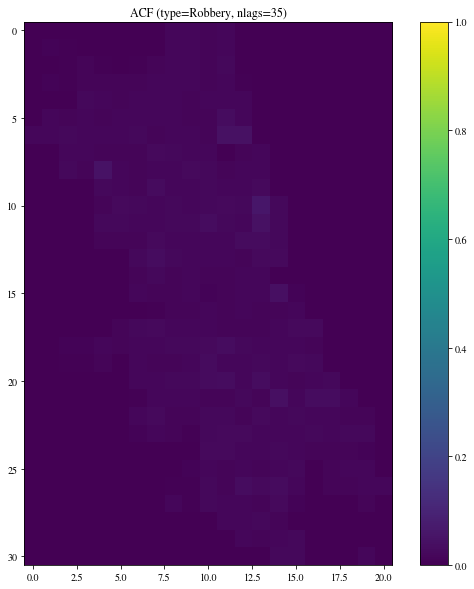

2021-01-23T10:10:14 | root | WARNING | binned 'a' into 35 bins => distribution: 
count    2557.000000
mean       10.564724
std         4.967285
min         0.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        34.000000
dtype: float64



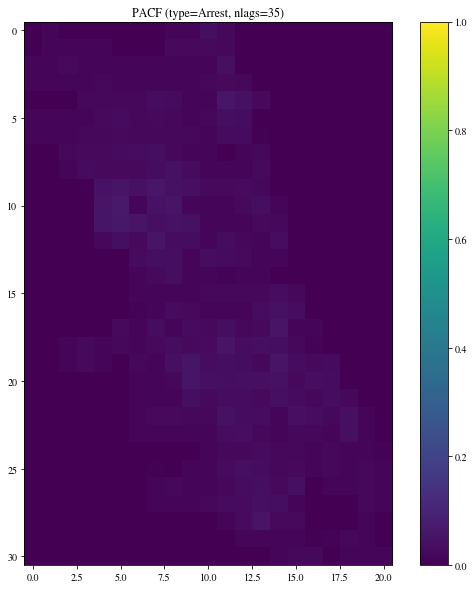

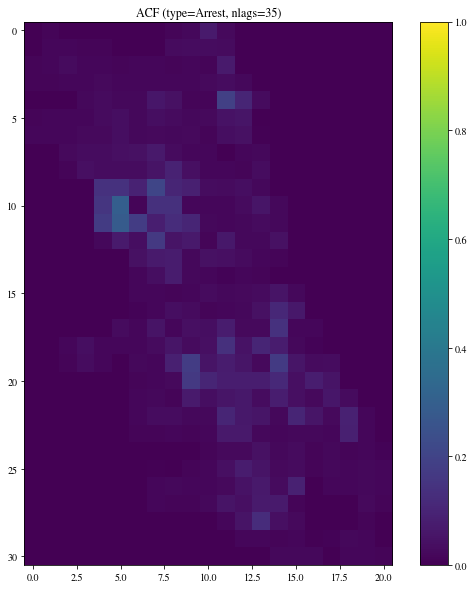

2021-01-23T10:10:17 | root | WARNING | binned 'a' into 18 bins => distribution: 
count    2557.000000
mean        5.336723
std         2.739690
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        17.000000
dtype: float64



In [65]:
nlags = {
    "1H":24*7,
    "24H":5*7,
    "168H":10,
}.get(FREQ)


conf.shaper_threshold = 0

for ctype, cname in enumerate(crime_feature_indices):
    display(HTML(f"<h1>{cname.title()}</h1>"))
    shaper = Shaper(sparse_crimes[:,ctype:ctype+1], conf)
    
    dense_crimes = shaper.squeeze(sparse_crimes)
    
    pac = vector_auto_corr(dense_grid=dense_crimes[:,ctype],nlags=nlags, partial=True).values
    pac_mean = np.abs(pac).mean(0)
    pac_mean_grid = shaper.unsqueeze(pac_mean.reshape(1,1,-1))[0,0]
    im(
        pac_mean_grid,title=f"PACF (type={cname.title()}, nlags={nlags})",
        vmin=0,vmax=1,
    )

    ac = vector_auto_corr(dense_grid=dense_crimes[:,ctype],nlags=nlags, partial=False).values
    ac_mean = np.abs(ac).mean(0)
    ac_mean_grid = shaper.unsqueeze(ac_mean.reshape(1,1,-1))[0,0]
    im(
        ac_mean_grid,title=f"ACF (type={cname.title()}, nlags={nlags})",
        vmin=0,vmax=1,
    )
    
    cell_index = pac_mean.argmax()
    cell_y,cell_x = shaper.i_to_yx(cell_index)
    
    
    plot(ACF=[1,*ac[:,cell_index]],
         PACF=[1,*pac[:,cell_index]],
         title=f"PACF and ACF of Cell (type={cname.title()},x={cell_x}, y={cell_y})",
         xlabel="Lag (k)").show()
    
    cell_values = dense_crimes[:,0,cell_index]
    
    plot_mi_curves(  # subplot_mi_curves(
        a=cell_values,
        t_range=t_range,
        temporal_variables=['Day of Week'],
        max_offset=nlags,
        bins=len(np.unique(cell_values)),
    ).show()
    

In [7]:
n,c,h,w = sparse_crimes.shape
n,c,h,w

(2557, 10, 23, 11)

In [8]:
def geo_correlation(dense_grid, i, t=0, filter_self=False):
    """
    dense_grid: crime counts nd. (n,l) being index in axis 1 or l
    filter_self: set the selected cell value lower to make the colorbar 
             more readable - select cell wil obviously have highest correlation
    """
    n,l = dense_grid.shape
    centre = dense_grid[:,i]
    
    rs = []
    pvs = []
    
    if t == 0:    
        for j in range(l):
            r, pv = pearsonr(centre, dense_grid[:,j])
            rs.append(r)
            pvs.append(pv)
    else:
        for j in range(l):
            r, pv = pearsonr(centre[t:], dense_grid[:-t,j])
            rs.append(r)
            pvs.append(pv)
            
    if filter_self:
        rs[i] = 0
                        
    rs = np.array(rs)
    pvs = np.array(pvs)
    return rs,pvs

def geo_correlation_over_time(dense_grid, i, max_offset=15):
    """
    get correlation between cell i and all other cells averaged over time lags from 1 to max_offset
    """
    rs_list = []
    pvs_list = []
    for t in range(1,max_offset+1):
        rs,pvs = geo_correlation(dense_grid, i, t, filter_self=False)
        rs_list.append(rs)
        pvs_list.append(pvs)
    
    rs = np.array(rs_list).mean(0)
    pvs = np.array(pvs_list).mean(0)
                   
    return rs, pvs

In [9]:
def heatmap(img,pv):
    h,w = img.shape
    hm = go.Heatmap(
        z=img,
        text=pv,
    )
    
    fw = go.FigureWidget(
        data=[hm],
        layout=dict(
            clickmode='event+select',
            width=600,
            height=800,
        )
    )
    return fw

In [10]:
dc = dense_crimes[:,0]
dc = np.round(np.log2(1 + dc)) # scale
topk = dc.mean(0).argsort()[::-1]

In [11]:
# only use a single day of the week
# dow_i = np.array([i for i in range(len(dc)-7) if i % 7 == 0]) + 0
# dc = dc[dow_i]

### Geo-correlation

In [12]:
i = topk[0]
y,x = shaper.i_to_yx(i)
t=0
filter_self=False

state = dict(
    x=x,
    y=y,
    i=i,
    t=t,
    filter_self=filter_self,
)

gcr,gcpv = geo_correlation(dc,i,t,filter_self)
geo_corr_grid = shaper.unsqueeze(gcr.reshape(1,1,-1))[0,0]
geo_pv_grid = shaper.unsqueeze(gcpv.reshape(1,1,-1))[0,0]

In [13]:
from ipywidgets import widgets

In [14]:
def get_widget_value(change):
    if isinstance(change, dict) and change.get('name') == 'value':
        return change.get('new')
    return None

### Geo-corr with t-slider 

In [15]:
fw = heatmap(geo_corr_grid, geo_pv_grid)

def draw():
    global fw, state, dc
        
    x = state['x']
    y = state['y']
    t = state['t']        
    filter_self = state['filter_self']
    
    i = shaper.yx_to_i(y,x)
    if i is None:
        fw.update_layout(title={"text":f"current cell: invalid coordinate"})
        return
    
    gcr,gcpv = geo_correlation(dc,i,t, filter_self)
    geo_corr_grid = shaper.unsqueeze(gcr.reshape(1,1,-1))[0,0]
    geo_pv_grid = shaper.unsqueeze(gcpv.reshape(1,1,-1))[0,0]
    
    with fw.batch_update():
        fw.update_layout(title={"text":f"current cell: y,x = {y,x}"})
        fw.data[0].z = geo_corr_grid
        fw.data[0].text = geo_pv_grid

def set_state(trace,points,selector):
    global state    
    
    y = points.ys[0]
    x = points.xs[0]

    state["x"] = x
    state["y"] = y
    draw()

    
def on_change_offset_slider(change):
    global state
    value = get_widget_value(change)
    if value is not None:
        state["t"] = value
        draw()
    
offset_slider = widgets.IntSlider(
    value=0,
    min=0, 
    max=30,
    step=1,
    description='Offset:',
    continuous_update=False,
)
offset_slider.observe(on_change_offset_slider)

filter_self_checkbox = widgets.Checkbox(
    value=state['filter_self'],
    description='Filter self',
)


def set_filter_self(change):
    value = get_widget_value(change)
    if value is not None:
        state['filter_self'] = value 
        draw()

filter_self_checkbox.observe(set_filter_self)

    
fw.data[0].on_click(set_state)
# fw.data[0].on_selection(set_state|)
widgets.VBox([    
    filter_self_checkbox,
    offset_slider,
    fw,
])

### Geo-corr averaged over time

In [16]:
max_offset = 100
gcr,gcpv = geo_correlation_over_time(dc,i,max_offset)
geo_corr_grid = shaper.unsqueeze(gcr.reshape(1,1,-1))[0,0]
geo_pv_grid = shaper.unsqueeze(gcpv.reshape(1,1,-1))[0,0]


fw = heatmap(geo_corr_grid, geo_pv_grid)

def draw():
    global fw, state, dc
        
    x = state['x']
    y = state['y']
    t = state['t']        
    filter_self = state['filter_self']
    
    i = shaper.yx_to_i(y,x)
    if i is None:
        fw.update_layout(title={"text":f"current cell: invalid coordinate"})
        return
    
    gcr,gcpv = geo_correlation_over_time(dc,i,max_offset)
    geo_corr_grid = shaper.unsqueeze(gcr.reshape(1,1,-1))[0,0]
    geo_pv_grid = shaper.unsqueeze(gcpv.reshape(1,1,-1))[0,0]
    
    with fw.batch_update():
        fw.update_layout(title={"text":f"current cell: y,x = {y,x}"})
        fw.data[0].z = geo_corr_grid
        fw.data[0].text = geo_pv_grid

def set_state(trace,points,selector):
    global state    
    
    y = points.ys[0]
    x = points.xs[0]

    state["x"] = x
    state["y"] = y
    draw()
    
fw.data[0].on_click(set_state)
# fw.data[0].on_selection(set_state|)
widgets.VBox([    
    filter_self_checkbox,
    fw,
])

    'data': [{'text': array([[…

### Mutual Information Grids

In [35]:
from sparse_discrete_table import quick_mutual_info, quick_cond_mutual_info
from sparse_discrete_table import mutual_info_over_time, conditional_mutual_info_over_time

In [36]:
def geo_mutual_info(dense_grid, i, t=0, condition=False, filter_self=False, lognorm=True):
    """
    dense_grid: crime counts nd. (n,l)
     being index in axis 1 or l
    """
    if lognorm:
        dense_grid = np.round(np.log2(1 + dense_grid))
    
    n,l = dense_grid.shape
    centre = dense_grid[:,i]
    dow  = np.arange(len(centre))
        
    mis = [] 
    if t == 0:    
        for j in range(l):
            if condition:
                cond = dow
                mi = quick_cond_mutual_info(centre, dense_grid[:,j], cond,True)
            else:
                mi = quick_mutual_info(centre, dense_grid[:,j],True)
            mis.append(mi)
    else:
        for j in range(l):
            if condition:
                cond = np.stack([dow[t:],dow[:-t]], axis=1)
                mi = quick_cond_mutual_info(centre[t:], dense_grid[:-t,j],cond, True)
            else:            
                mi = quick_mutual_info(centre[t:], dense_grid[:-t,j], True)
            mis.append(mi)    
               
    if filter_self:
        mis[i] = 0
    mis = np.array(mis)
    return mis

In [75]:
# state = dict(
#     i=topk[0],
#     t=0,
# )

# # geo_mi = geo_mutual_info(dense_grid=dc,i=state['i'],t=state['t'],False)
# geo_mi = geo_mutual_info(
#     dense_grid=dc,
#     i=state['i'],
#     t=state['t'],
#     condition=False,
#     filter_self=False,
#     lognorm=True,
# )


# geo_mi_grid = shaper.unsqueeze(geo_mi.reshape(1,1,-1))[0,0]

# fw = go.FigureWidget(
#     data=[
#         go.Heatmap(            
#             z=geo_mi_grid,
#             text=geo_mi_grid,
#             zmin=0,
#             zmax=.03,
#         ),
# #         go.Surface(            
# #             z=geo_mi_grid,
# #             text=geo_mi_grid,
# #         ),                
#     ],
#     layout=dict(
#         clickmode='event+select',
#         width=600,
#         height=800,
#     )
# )

# def draw():
#     global fw, state, dc
    
#     x = state['x']
#     y = state['y']
#     t = state['t']
        
#     i = shaper.yx_to_i(y,x)
#     if i is None:
#         fw.update_layout(title={"text":f"current cell: invalid coordinate"})
#         return
    
#     geo_mi = geo_mutual_info(
#         dense_grid=dc,
#         i=i,
#         t=t,
#         condition=False, # True,#
#         filter_self=False,
#         lognorm=True,
#     )
#     geo_mi_grid = shaper.unsqueeze(geo_mi.reshape(1,1,-1))[0,0]
    
#     with fw.batch_update():
#         fw.data[0].z = geo_mi_grid
#         fw.update_layout(title={"text":f"y,x = {y,x}"})

# def on_click_heatmap(trace,points,selector):
#     global state    
    
#     y = points.ys[0]
#     x = points.xs[0]
# #     print(f"click {x},{y} => {mm[y,x]}")
# #     print(f"click {i} => {dm[i]}")    
    
#     state["x"] = x
#     state["y"] = y    
#     draw()

    
# def on_change_offset(change):
#     global state
#     value = get_widget_value(change)
#     if value is not None:
#         state["t"] = value
#         draw()
    
# offset_slider = widgets.IntSlider(
#     value=0,
#     min=0, 
#     max=30,
#     step=1,
#     description='Offset:',
#     continuous_update=False,
# )

# # callback registers
# offset_slider.observe(on_change_offset)
# fw.data[0].on_click(on_click_heatmap)


# widgets.VBox([    
#     offset_slider,
#     fw,
# ])